In [11]:
import numpy as np
import rasterio
from rasterio.plot import show

In [12]:
dataset = rasterio.open('soil_moisture.tif')
array = dataset.read(1)
print(array)
average_value = array[array!=65535].mean()
print("The average value of humidity in the image:",average_value)


[[65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 ...
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]]
The average value of humidity in the image: 3061.4033573708475


In [13]:
max_value = array[array != 65535].max()
max_count = array[array == max_value].size
max_row_col_index = np.where(array == max_value)
max_lot_lat = dataset.transform * (max_row_col_index[0][0], max_row_col_index[1][0])
print(f'The maximum value of humidity in the image: {max_value}; their amount: {max_count}; coordinates are {max_lot_lat}.')

min_value = array[array != 65535].min()
min_count = array[array == min_value].size
min_row_col_index = np.where(array == min_value)
min_lot_lat = dataset.transform * (min_row_col_index[0][0], min_row_col_index[1][0])
print(f'The minimum value of humidity in the image: {min_value}; their amount: {min_count}; coordinates are {min_lot_lat}.')

The maximum value of humidity in the image: 3824; their amount: 1; coordinates are (29.724966444000007, 49.999172646000005).
The minimum value of humidity in the image: 2139; their amount: 1; coordinates are (29.997883067000007, 50.159589287).


In [14]:
new_array = array.copy()
new_array[new_array == 65535] = 0
print(new_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
create_dataset=rasterio.open ('fake_soil_moisture.tif', 
    "w",
    driver='GTiff',
    height = dataset.shape[0],
    width = dataset.shape[1],
    count = 1,
    dtype = array.dtype,
    crs = dataset.crs,
    transform = dataset.transform,)
create_dataset.write(new_array, 1)
create_dataset.close()


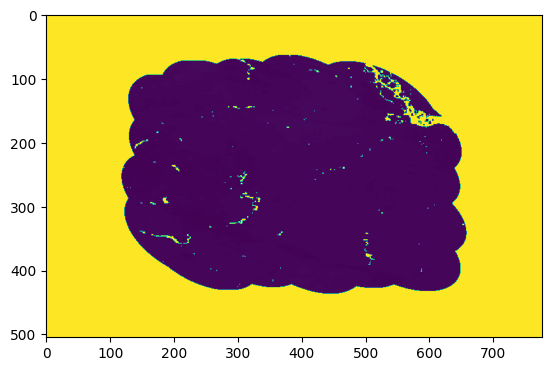

<Axes: >

In [16]:
show(array)

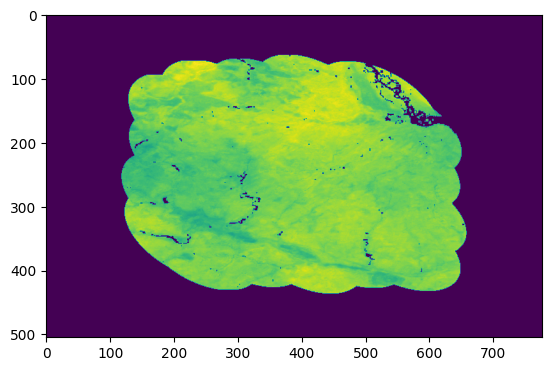

<Axes: >

In [17]:
show(new_array)